In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# path to images
path = 'animals/'

# animal categories
categories = ['dogs', 'panda', 'cats'] 

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
for category in categories:
    print(category)

dogs
panda
cats


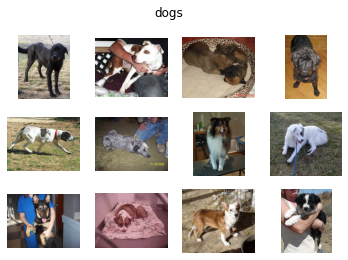

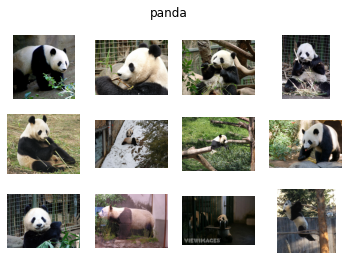

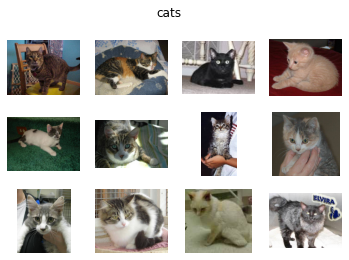

In [4]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [5]:
shape0 = []# height of image
shape1 = []# width of image

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


In [6]:
# initialize the data and labels
data = [] # append all images (resize)
labels = []  # append the category /label of image
imagePaths = []   # append the path of each image 
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

print(imagePaths[:10])
import random
random.shuffle(imagePaths)
print(imagePaths[:10])


[['animals/dogs/dogs_00001.jpg', 0], ['animals/dogs/dogs_00002.jpg', 0], ['animals/dogs/dogs_00003.jpg', 0], ['animals/dogs/dogs_00004.jpg', 0], ['animals/dogs/dogs_00005.jpg', 0], ['animals/dogs/dogs_00006.jpg', 0], ['animals/dogs/dogs_00007.jpg', 0], ['animals/dogs/dogs_00008.jpg', 0], ['animals/dogs/dogs_00009.jpg', 0], ['animals/dogs/dogs_00010.jpg', 0]]
[['animals/panda/panda_00490.jpg', 1], ['animals/dogs/dogs_00852.jpg', 0], ['animals/dogs/dogs_00421.jpg', 0], ['animals/panda/panda_00352.jpg', 1], ['animals/panda/panda_00636.jpg', 1], ['animals/cats/cats_00526.jpg', 2], ['animals/dogs/dogs_00762.jpg', 0], ['animals/dogs/dogs_00033.jpg', 0], ['animals/panda/panda_00854.jpg', 1], ['animals/dogs/dogs_00699.jpg', 0]]


In [7]:

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

In [8]:
data[0]

array([[[ 47,  71,  69],
        [ 47,  69,  67],
        [ 46,  68,  66],
        ...,
        [ 61,  93,  89],
        [ 61,  93,  88],
        [ 65,  96,  90]],

       [[ 39,  53,  59],
        [ 37,  51,  57],
        [ 37,  51,  57],
        ...,
        [ 57,  89,  84],
        [ 59,  91,  86],
        [ 67,  99,  94]],

       [[ 34,  40,  51],
        [ 34,  40,  51],
        [ 34,  40,  51],
        ...,
        [ 55,  78,  79],
        [ 60,  84,  82],
        [ 60,  90,  87]],

       ...,

       [[116, 162, 237],
        [102, 128, 227],
        [ 52,  69, 106],
        ...,
        [ 34,  38,  39],
        [ 37,  62,  58],
        [ 53,  86,  81]],

       [[122, 182, 254],
        [ 99, 141, 215],
        [114, 175, 251],
        ...,
        [ 21,  40,  37],
        [ 33,  52,  49],
        [ 36,  59,  55]],

       [[124, 183, 250],
        [112, 186, 233],
        [137, 191, 250],
        ...,
        [ 21,  31,  30],
        [ 26,  32,  31],
        [ 28,  30,  30]]

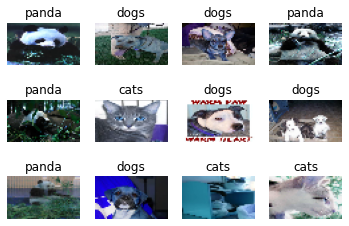

In [9]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0   # independent features
labels = np.array(labels)     # dependent features
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [10]:
data[0]
len(data)

3000

In [11]:
len(labels)

3000

In [12]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
# Preprocess class labels
print(trainY)
trainY = np_utils.to_categorical(trainY, 3)  # actual y 

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
trainY

[0 1 2 ... 0 0 2]
(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3)
(600,)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [13]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   # max value access from 2,2 matrix
model.add(Dropout(0.25))
model.add(Flatten()) # to convert array of image  into 1D
model.add(Dense(128, activation='relu'))


model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0

In [14]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
75/75 [==============================] - 3s 27ms/step - loss: 0.9164 - accuracy: 0.5063
Epoch 2/25
75/75 [==============================] - 2s 27ms/step - loss: 0.7275 - accuracy: 0.6338
Epoch 3/25
75/75 [==============================] - 2s 27ms/step - loss: 0.6695 - accuracy: 0.6704
Epoch 4/25
75/75 [==============================] - 2s 27ms/step - loss: 0.6156 - accuracy: 0.7071
Epoch 5/25
75/75 [==============================] - 2s 27ms/step - loss: 0.5642 - accuracy: 0.7442
Epoch 6/25
75/75 [==============================] - 2s 27ms/step - loss: 0.5482 - accuracy: 0.7496
Epoch 7/25
75/75 [==============================] - 2s 26ms/step - loss: 0.5160 - accuracy: 0.7679
Epoch 8/25
75/75 [==============================] - 2s 27ms/step - loss: 0.4761 - accuracy: 0.7854
Epoch 9/25
75/75 [==============================] - 2s 27ms/step - loss: 0.4373 - accuracy: 0.8033
Epoch 10/25
75/75 [==============================] - 2s 27ms/step - loss: 0.4178 - accuracy: 0.8175
Epoch 11/

19/19 [==============================] - 0s 8ms/step


C:\Users\Manish\AppData\Local\Temp/ipykernel_8488/2605312693.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
C:\Users\Manish\AppData\Local\Temp/ipykernel_8488/2605312693.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


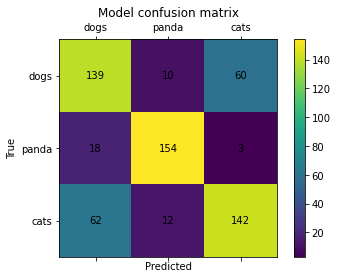

Accuracy : 72.50%


In [15]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))